Name: 
Type: Graph
Number of nodes: 71
Number of edges: 94
Average degree:   2.6479


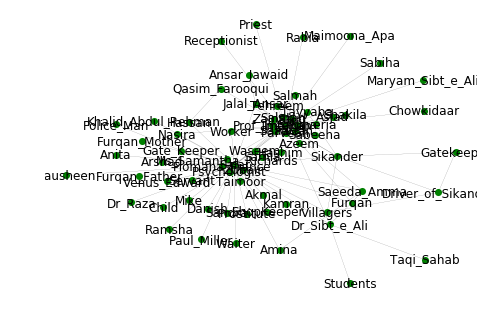

0.22263358707020675

In [2]:
#MAIN GRAPH
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community

g = nx.read_weighted_edgelist("edges.txt")

print(nx.info(g))

options = {
    'node_color': 'green',
    'node_size': 50,
    'line_color': 'blue',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw_kamada_kawai(g, with_labels=True, **options)
plt.show()
nx.average_clustering(g)





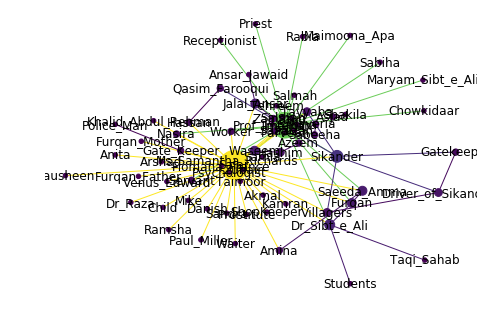

In [3]:
#GRAPH WITH CHARACTER PRIORITY
d = [] # create a set
for n in g.nodes():
    d.append(g.degree(n))
    
ec = [] # create a set
for e in g.edges():
    if(g.degree(e[0]) > g.degree(e[1])):
        ec.append(g.degree(e[0]))
    else:
        ec.append(g.degree(e[1]))
factor = 20


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw_kamada_kawai(g,
        edge_color = ec,  edge_cmap=plt.cm.viridis,  # edge color
        node_color = d, cmap=plt.cm.viridis, # node color
        node_size=[x * factor for x in d], with_labels=True) # node sizse




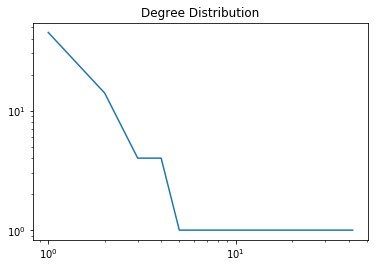

In [73]:
#DEGREE DISTRIBUTION OF THE GRAPH
def plot_degree_distribution (wiki) :
    degs = {}
    for n in wiki.nodes () :
        deg = wiki.degree ( n )
        
        
        if deg not in degs :
            degs [ deg ] = 0
        
        degs [ deg ] += 1
    items = sorted ( degs.items () )
            
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig ("degree_distribution.png")
    
            
plot_degree_distribution(g)